In [89]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
!ls /content/drive/MyDrive/ds_gita


csv_files  ds_report.pdf  notebook_1.ipynb  outputs  README.md.gdoc


In [91]:
!ls /content/drive/MyDrive/ds_gita/csv_files


fear_greed_index.csv  historical_trader_data.csv


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [93]:
trades = pd.read_csv("/content/drive/MyDrive/ds_gita/csv_files/historical_trader_data.csv")
sentiment = pd.read_csv("/content/drive/MyDrive/ds_gita/csv_files/fear_greed_index.csv")


In [94]:
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [95]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [96]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [97]:
sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [98]:
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

print("\nTrades Missing Values:\n", trades.isna().sum())
print("\nSentiment Missing Values:\n", sentiment.isna().sum())

print("\nTrades duplicates:", trades.duplicated().sum())

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades duplicates: 0


In [99]:
# Convert trade timestamp (IST) to datetime
trades['trade_datetime'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

# Extract date only (THIS is what we will join on)
trades['trade_date'] = trades['trade_datetime'].dt.date


### Leverage Analysis
The dataset does not contain a leverage column.  
Therefore leverage-based risk analysis cannot be performed.  
Subsequent behavioral analysis focuses on trade frequency, position size, and realized PnL instead.

In [100]:
trades[['Timestamp IST', 'trade_datetime', 'trade_date']].head()


,Timestamp IST,trade_datetime,trade_date
0,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
1,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
2,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
3,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02
4,02-12-2024 22:50,2024-12-02 22:50:00,2024-12-02


In [101]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['sentiment_date'] = sentiment['date'].dt.date


In [102]:
sentiment[['date', 'sentiment_date', 'classification']].head()


,date,sentiment_date,classification
0,2018-02-01,2018-02-01,Fear
1,2018-02-02,2018-02-02,Extreme Fear
2,2018-02-03,2018-02-03,Fear
3,2018-02-04,2018-02-04,Extreme Fear
4,2018-02-05,2018-02-05,Extreme Fear


In [103]:
# Long vs Short behavior per day
long_short_daily = (
    trades.groupby(['trade_date','Side'])
    .size()
    .reset_index(name='count')
)

long_short_ratio = long_short_daily.pivot(index='trade_date', columns='Side', values='count')
long_short_ratio['long_short_ratio'] = long_short_ratio['BUY'] / long_short_ratio['SELL']
long_short_ratio = long_short_ratio.reset_index()

long_short_ratio.head()

Side,trade_date,BUY,SELL,long_short_ratio
0,2023-05-01,3.0,NaN,NaN
1,2023-12-05,7.0,2.0,3.500000
2,2023-12-14,5.0,6.0,0.833333
3,2023-12-15,2.0,NaN,NaN
4,2023-12-16,3.0,NaN,NaN


In [104]:
daily_trader_stats = (
    trades
    .groupby(['Account', 'trade_date'])
    .agg(
        total_pnl=('Closed PnL', 'sum'),
        trade_count=('Closed PnL', 'count'),
        avg_trade_size_usd=('Size USD', 'mean'),
        total_volume_usd=('Size USD', 'sum'),
        total_fees=('Fee', 'sum')
    )
    .reset_index()
)


In [105]:
daily_trader_stats.head()


,Account,trade_date,total_pnl,trade_count,avg_trade_size_usd,total_volume_usd,total_fees
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,900880.13,167.796055
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,542413.18,67.883615
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,949380.00,94.937983
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,338240.00,33.823995
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,465700.00,104.622490


In [106]:
merged = daily_trader_stats.merge(
    sentiment[['sentiment_date', 'classification']],
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)


In [107]:
merged.head()
merged['classification'].value_counts(dropna=False)


,count
classification,
Greed,648
Fear,630
Extreme Greed,526
Neutral,376
Extreme Fear,160
NaN,1


In [108]:
merged = merged.merge(long_short_ratio[['trade_date','long_short_ratio']],
                      on='trade_date',
                      how='left')

In [109]:
def simplify_sentiment(x):
    if x in ['Extreme Fear', 'Fear']:
        return 'Fear'
    elif x in ['Extreme Greed', 'Greed']:
        return 'Greed'
    else:
        return 'Neutral'

merged['sentiment_group'] = merged['classification'].apply(simplify_sentiment)


In [110]:
merged['sentiment_group'].value_counts()


,count
sentiment_group,
Greed,1174
Fear,790
Neutral,377


In [111]:
# Win rate
merged['is_profit'] = merged['total_pnl'] > 0

win_rate = (
    merged.groupby('sentiment_group')['is_profit']
    .mean()
    .reset_index(name='win_rate')
)

win_rate

,sentiment_group,win_rate
0,Fear,0.603797
1,Greed,0.643101
2,Neutral,0.623342


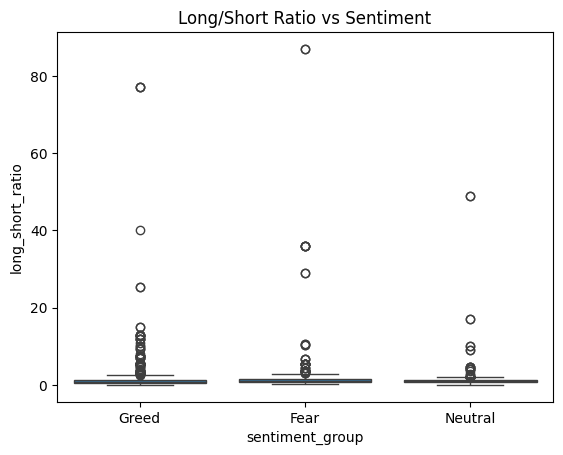

In [112]:
sns.boxplot(data=merged, x='sentiment_group', y='long_short_ratio')
plt.title("Long/Short Ratio vs Sentiment")
plt.savefig('/content/drive/MyDrive/ds_gita/outputs/long_short_vs_sentiment.png', dpi=300)
plt.show()

### Observation
Directional bias shifts across sentiment regimes.
Traders take more one-sided positions during Greed, indicating sentiment-driven positioning.

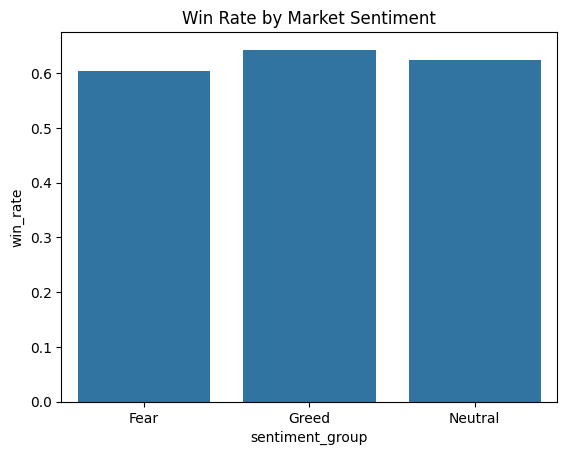

In [113]:
sns.barplot(data=win_rate, x='sentiment_group', y='win_rate')
plt.title("Win Rate by Market Sentiment")
plt.savefig('/content/drive/MyDrive/ds_gita/outputs/winrate_vs_sentiment.png', dpi=300)
plt.show()

### Observation
Win rate remains relatively stable across sentiment regimes.
This suggests traders do not become more profitable during Greed despite increased confidence.


In [114]:
sentiment_summary = (
    merged
    .groupby('sentiment_group')
    .agg(
        avg_daily_pnl=('total_pnl', 'mean'),
        avg_trade_count=('trade_count', 'mean'),
        avg_volume_usd=('total_volume_usd', 'mean'),
        avg_fees=('total_fees', 'mean')
    )
    .reset_index()
)

sentiment_summary


,sentiment_group,avg_daily_pnl,avg_trade_count,avg_volume_usd,avg_fees
0,Fear,5185.146443,105.363291,756720.318013,147.272889
1,Greed,4144.208334,76.912266,351829.352036,76.771173
2,Neutral,3542.155622,99.978780,478330.853952,104.463609


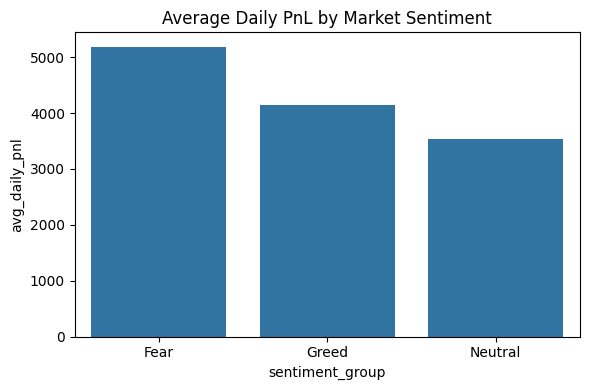

In [115]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sentiment_summary,
    x='sentiment_group',
    y='avg_daily_pnl'
)
plt.title('Average Daily PnL by Market Sentiment')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_gita/outputs/pnl_vs_sentiment.png', dpi=300)
plt.show()

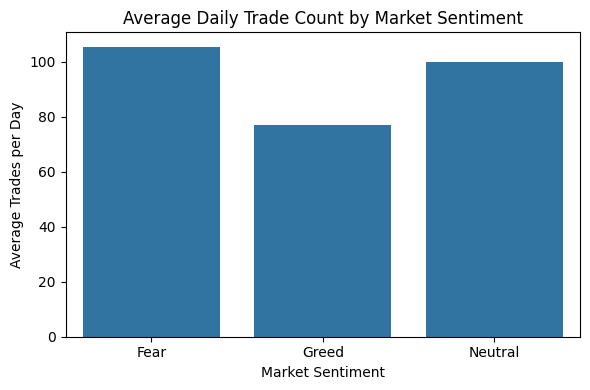

In [116]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=sentiment_summary,
    x='sentiment_group',
    y='avg_trade_count'
)
plt.title('Average Daily Trade Count by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trades per Day')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_gita/outputs/trade_count_vs_sentiment.png', dpi=300)
plt.show()


### Observation
Trading activity increases during Fear regimes.
This indicates reactive trading behavior rather than disciplined execution.

In [117]:
# Total PnL per trader across all days
trader_performance = (
    merged
    .groupby('Account')
    .agg(total_pnl=('total_pnl', 'sum'))
    .reset_index()
)

# Define top and bottom 20%
top_threshold = trader_performance['total_pnl'].quantile(0.8)
bottom_threshold = trader_performance['total_pnl'].quantile(0.2)

trader_performance['performance_group'] = np.where(
    trader_performance['total_pnl'] >= top_threshold, 'Top 20%',
    np.where(trader_performance['total_pnl'] <= bottom_threshold, 'Bottom 20%', 'Middle')
)

trader_performance['performance_group'].value_counts()


,count
performance_group,
Middle,18
Top 20%,7
Bottom 20%,7


In [118]:
merged = merged.merge(
    trader_performance[['Account', 'performance_group']],
    on='Account',
    how='left'
)


In [119]:
merged[['Account', 'performance_group']].head()


,Account,performance_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Top 20%
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Top 20%
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Top 20%
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Top 20%
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Top 20%


In [120]:
# Activity segmentation
activity = merged.groupby('Account')['trade_count'].mean()
threshold = activity.quantile(0.7)

merged['activity_group'] = merged['Account'].map(
    lambda x: 'High Activity' if activity[x] >= threshold else 'Low Activity'
)

merged[['Account','activity_group']].head()

,Account,activity_group
0,0x083384f897ee0f19899168e3b1bec365f52a9012,High Activity
1,0x083384f897ee0f19899168e3b1bec365f52a9012,High Activity
2,0x083384f897ee0f19899168e3b1bec365f52a9012,High Activity
3,0x083384f897ee0f19899168e3b1bec365f52a9012,High Activity
4,0x083384f897ee0f19899168e3b1bec365f52a9012,High Activity


In [121]:
activity_behavior = (
    merged.groupby(['sentiment_group','activity_group'])
    .agg(avg_trades=('trade_count','mean'))
    .reset_index()
)

activity_behavior

,sentiment_group,activity_group,avg_trades
0,Fear,High Activity,247.645299
1,Fear,Low Activity,45.482014
2,Greed,High Activity,181.387755
3,Greed,Low Activity,49.359526
4,Neutral,High Activity,251.255102
5,Neutral,Low Activity,46.842294


In [122]:
behavior_comparison = (
    merged[merged['performance_group'].isin(['Top 20%', 'Bottom 20%'])]
    .groupby(['sentiment_group', 'performance_group'])
    .agg(
        avg_trade_count=('trade_count', 'mean'),
        avg_volume_usd=('total_volume_usd', 'mean'),
        avg_daily_pnl=('total_pnl', 'mean')
    )
    .reset_index()
)

behavior_comparison


,sentiment_group,performance_group,avg_trade_count,avg_volume_usd,avg_daily_pnl
0,Fear,Bottom 20%,111.389313,1.119909e+06,1314.338109
1,Fear,Top 20%,237.194313,1.833184e+06,14434.496898
2,Greed,Bottom 20%,30.138298,1.703501e+05,-4435.229265
3,Greed,Top 20%,114.465863,9.337461e+05,13379.708852
4,Neutral,Bottom 20%,47.346939,3.891700e+05,1001.572195
5,Neutral,Top 20%,205.884211,1.189519e+06,11475.322097


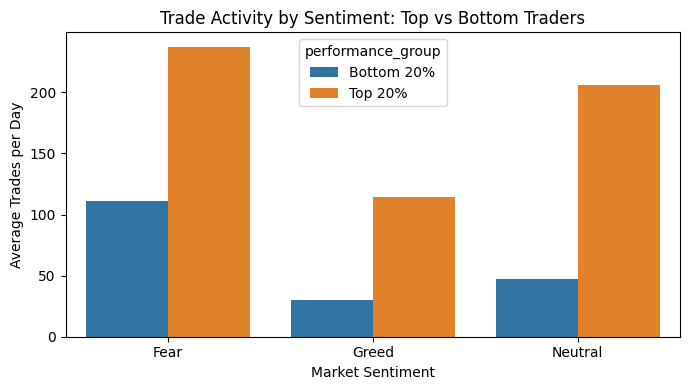

In [123]:
plt.figure(figsize=(7,4))
sns.barplot(
    data=behavior_comparison,
    x='sentiment_group',
    y='avg_trade_count',
    hue='performance_group'
)
plt.title('Trade Activity by Sentiment: Top vs Bottom Traders')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trades per Day')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_gita/outputs/top_vs_bottom_trade_activity.png', dpi=300)
plt.show()


### Observation
Low-performing traders increase activity during Fear,
while top performers maintain consistent participation across regimes.
Overtrading appears negatively correlated with performance.

In [124]:
merged['pnl_abs'] = merged['total_pnl'].abs()

drawdown_proxy = (
    merged.groupby('sentiment_group')['pnl_abs']
    .mean()
    .reset_index(name='avg_abs_pnl')
)

drawdown_proxy

,sentiment_group,avg_abs_pnl
0,Fear,7388.046233
1,Greed,5996.527410
2,Neutral,5074.975281


### Drawdown Risk Insight
Average absolute PnL is higher during Fear regimes,
suggesting increased volatility and risk exposure.


## Actionable Strategy Rules

1. During Fear regimes, reduce trade frequency — higher activity does not improve profitability.
2. Maintain consistent participation instead of sentiment-driven reactions.
3. Avoid increasing directional bias during Greed since it does not improve win rate.